# Be in Fashion

MNIST nowadays is considered an "easy" dataset. So, let's use something more challenging... the Fashion MNIST!

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


4423680/4422102 [==============================] - 4s 1us/step


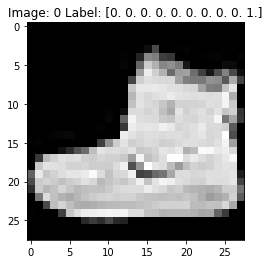

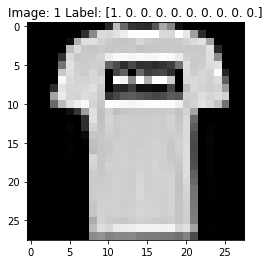

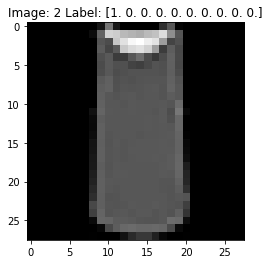

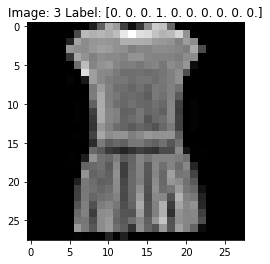

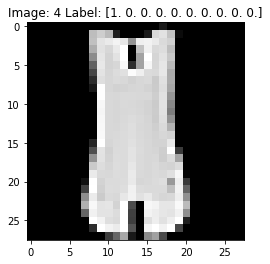

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten, Dropout
from keras.optimizers import Adam
%matplotlib inline


# Prepare the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

for i in range(5):
    plt.figure(i)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title("Image: " + str(i) + " Label: " + str(y_train[i]))



Use the same model as before and examine its performance:

In [2]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 6s - loss: 0.5621 - acc: 0.7976 - val_loss: 0.3793 - val_acc: 0.8653
Epoch 2/30
 - 4s - loss: 0.3358 - acc: 0.8789 - val_loss: 0.3157 - val_acc: 0.8882
Epoch 3/30
 - 4s - loss: 0.2765 - acc: 0.9005 - val_loss: 0.2926 - val_acc: 0.8923
Epoch 4/30
 - 4s - loss: 0.2509 - acc: 0.9083 - val_loss: 0.3261 - val_acc: 0.8807
Epoch 5/30
 - 4s - loss: 0.2225 - acc: 0.9189 - val_loss: 0.2732 - val_acc: 0.9031
Epoch 6/30
 - 4s - loss: 0.2019 - acc: 0.9259 - val_loss: 0.2600 - val_acc: 0.9047
Epoch 7/30
 - 4s - loss: 0.1862 - acc: 0.9310 - val_loss: 0.2406 - val_acc: 0.9138
Epoch 8/30
 - 4s - loss: 0.1667 - acc: 0.9384 - val_loss: 0.2438 - val_acc: 0.9122
Epoch 9/30
 - 4s - loss: 0.1494 - acc: 0.9453 - val_loss: 0.2432 - val_acc: 0.9144
Epoch 10/30
 - 4s - loss: 0.1359 - acc: 0.9506 - val_loss: 0.2537 - val_acc: 0.9160
Epoch 11/30
 - 4s - loss: 0.1244 - acc: 0.9546 - val_loss: 0.2442 - val_acc: 0.9183
Epoch 12/30
 - 4s - loss: 0.1091 - 

60000/60000 [==============================] - 2s 35us/step
Train error (%):  0.6883333365122439
10000/10000 [==============================] - 0s 35us/step
Test error (%):  8.420000000000002


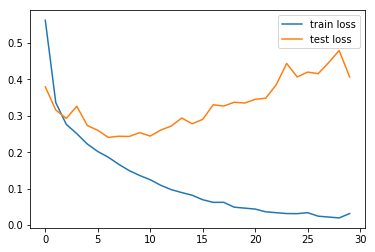

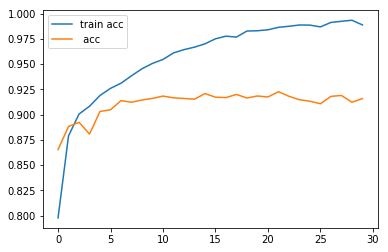

In [3]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.legend(['train acc', ' acc'])

print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

The model now seems to overfit the data. So, it is time to use a regularization technique!

In [4]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 5s - loss: 0.6674 - acc: 0.7537 - val_loss: 0.4215 - val_acc: 0.8486
Epoch 2/30
 - 5s - loss: 0.4208 - acc: 0.8472 - val_loss: 0.3627 - val_acc: 0.8694
Epoch 3/30
 - 5s - loss: 0.3643 - acc: 0.8670 - val_loss: 0.3270 - val_acc: 0.8852
Epoch 4/30
 - 5s - loss: 0.3366 - acc: 0.8753 - val_loss: 0.3105 - val_acc: 0.8891
Epoch 5/30
 - 5s - loss: 0.3131 - acc: 0.8834 - val_loss: 0.2874 - val_acc: 0.8961
Epoch 6/30
 - 5s - loss: 0.2982 - acc: 0.8896 - val_loss: 0.2790 - val_acc: 0.8977
Epoch 7/30
 - 5s - loss: 0.2884 - acc: 0.8933 - val_loss: 0.2715 - val_acc: 0.9011
Epoch 8/30
 - 5s - loss: 0.2749 - acc: 0.8986 - val_loss: 0.2579 - val_acc: 0.9071
Epoch 9/30
 - 5s - loss: 0.2688 - acc: 0.8999 - val_loss: 0.2598 - val_acc: 0.9032
Epoch 10/30
 - 5s - loss: 0.2630 - acc: 0.9014 - val_loss: 0.2491 - val_acc: 0.9096
Epoch 11/30
 - 5s - loss: 0.2529 - acc: 0.9057 - val_loss: 0.2482 - val_acc: 0.9109
Epoch 12/30
 - 5s - loss: 0.2468 - 

60000/60000 [==============================] - 2s 35us/step
Train error (%):  3.9650000031789148
10000/10000 [==============================] - 0s 36us/step
Test error (%):  7.5


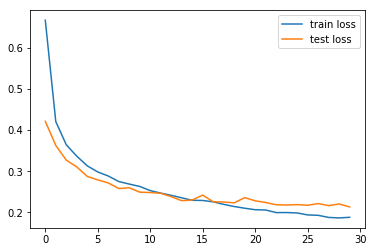

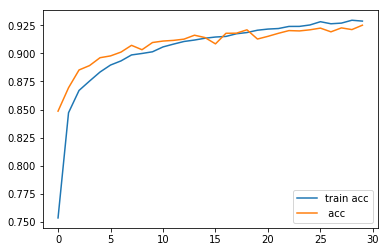

In [5]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.legend(['train acc', ' acc'])

print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

It helps a bit! But, the model now seems to have the opposite problem, it cannot model the data well enough. So ... add more layers!

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

results = model.fit(x_train, y_train,
          batch_size=256,
          epochs=30,
          verbose=2,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 10s - loss: 0.6734 - acc: 0.7480 - val_loss: 0.4167 - val_acc: 0.8473
Epoch 2/30
 - 9s - loss: 0.3989 - acc: 0.8540 - val_loss: 0.3197 - val_acc: 0.8820
Epoch 3/30
 - 9s - loss: 0.3300 - acc: 0.8802 - val_loss: 0.2879 - val_acc: 0.8973
Epoch 4/30
 - 9s - loss: 0.2947 - acc: 0.8925 - val_loss: 0.2751 - val_acc: 0.8964
Epoch 5/30
 - 9s - loss: 0.2713 - acc: 0.9005 - val_loss: 0.2413 - val_acc: 0.9109
Epoch 6/30
 - 9s - loss: 0.2566 - acc: 0.9062 - val_loss: 0.2393 - val_acc: 0.9132
Epoch 7/30
 - 9s - loss: 0.2406 - acc: 0.9109 - val_loss: 0.2298 - val_acc: 0.9154
Epoch 8/30
 - 9s - loss: 0.2299 - acc: 0.9159 - val_loss: 0.2241 - val_acc: 0.9185
Epoch 9/30
 - 9s - loss: 0.2217 - acc: 0.9182 - val_loss: 0.2174 - val_acc: 0.9226
Epoch 10/30
 - 9s - loss: 0.2149 - acc: 0.9209 - val_loss: 0.2145 - val_acc: 0.9234
Epoch 11/30
 - 9s - loss: 0.2042 - acc: 0.9235 - val_loss: 0.2056 - val_acc: 0.9254
Epoch 12/30
 - 9s - loss: 0.1998 -

60000/60000 [==============================] - 3s 56us/step
Train error (%):  1.806666666666672
10000/10000 [==============================] - 1s 55us/step
Test error (%):  6.3999999999999915


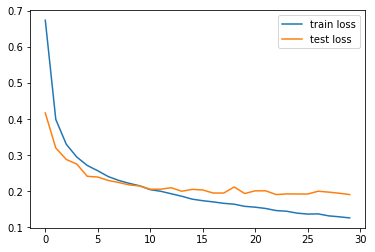

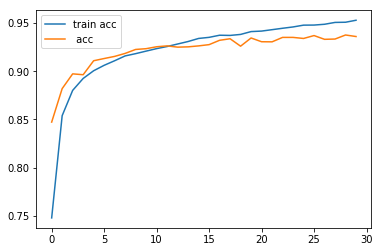

In [7]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.legend(['train acc', ' acc'])

print("Train error (%): ", 100  - model.evaluate(x_train, y_train, batch_size=128)[1]*100)
print("Test error (%): ", 100- model.evaluate(x_test, y_test, batch_size=128)[1]*100)

Other things to consider:

1.  Learning rate scheduling (implemented as keras callback)
2.  Using data augmentation (keras also natively supports data augmentation)
3.  Using batch normalization
3.  Selecting the best optimizer (Adam, RMSProp, SGD+Momentum, ...)

1+2 are especially important for more challenging datasets!!

